In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

import re
import json
import time

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [167]:
df = pd.read_csv('./OPTION2_joined_coursework_dataset_banking_final.csv')

In [168]:
df

,text,label,query_index
0,Can I automatically top-up when traveling?,top_up_queries_or_issues,526cd7f17526
1,What kind of fiat currency can I used for hold...,other,f3cf7343067e
2,I did not get the item I ordered. How should ...,other,9a19501c3a3c
3,Freeze my account it's been hacked.,needs_troubleshooting,d76b07db8cf8
4,is there a reason that my payment didnt go thr...,other,bd95ba09a18d
...,...,...,...
14190,Can you tell me what the disposable cards are ...,card_queries_or_issues,bd6df98cc746
14191,The ATM won't give me my card back. I need it ...,card_queries_or_issues,e6197a1334b3
14192,Can you please tell me why my card payments ar...,card_queries_or_issues,b922a2a5f687
14193,The rate for a currency exchange was wrong whe...,needs_troubleshooting,cb1ed2c3ca95


In [169]:
df.shape

(14195, 3)

In [170]:
df.columns

Index(['text', 'label', 'query_index'], dtype='object')

In [171]:
df['label'].value_counts()

other                       5036
needs_troubleshooting       4305
card_queries_or_issues      2598
top_up_queries_or_issues    1684
Other                         21
Card_queries_or_issues        12
Top_up_queries_or_issues      11
Needs_troubleshooting          7
Name: label, dtype: int64

In [172]:
df['label'] = df['label'].str.lower()

In [173]:
df['label'].value_counts()

other                       5057
needs_troubleshooting       4312
card_queries_or_issues      2610
top_up_queries_or_issues    1695
Name: label, dtype: int64

In [174]:
pd.DataFrame(df['text'].value_counts())

,text
#,68
I topped up but the app did not accept it.,3
How do I know if my top up was unsuccessful?,3
"Oh my goodness, my card has been declined twice at ATM! I tried two different ATM, but each one declined my card! Can you tell me what's going on with my account?",3
I don't understand where this debit came from and want it removed.,3
...,...
My statement shows different transaction times.,1
What are the steps I need to take to cancel a transaction?,1
after i got married i need to change my name,1
I still have not received an answer as to why I was charged $1.00 in a transaction?,1


In [175]:
df[df['text'] == '#']

,text,label,query_index
106,#,needs_troubleshooting,226t0c5be7cf
139,#,other,10et93272e2e
266,#,other,849t6f85a049
346,#,other,73ft45a21d0f
530,#,card_queries_or_issues,ef6teff01216
...,...,...,...
13505,#,top_up_queries_or_issues,33dte465441a
13531,#,needs_troubleshooting,451t8fa10c0d
13799,#,other,b25teb82e4a2
13825,#,top_up_queries_or_issues,763tcd9275b1


In [176]:
df[df['text'] == '#']['label'].value_counts()

other                       32
needs_troubleshooting       12
card_queries_or_issues      12
top_up_queries_or_issues    12
Name: label, dtype: int64

In [177]:
df[df['text'] == '#']['label'].value_counts().idxmax()

'other'

In [178]:
df[df['text'] == '#']['label'] = df[df['text'] == '#']['label'].value_counts().idxmax()

In [179]:
highest_count = df[df['text'] == '#']['label'].value_counts().idxmax()
df.loc[df['text'] == '#', 'label'] = highest_count

In [180]:
df.isna().sum()

text             0
label          521
query_index      0
dtype: int64

In [181]:
df[df['label'].isna()]

,text,label,query_index
17,What do you charge to top up US cards?,NaN,f9ct7333337b
22,I did a transfer to my account but it doesn't ...,NaN,a85ta60fdb59
43,I'm not recognizing the card payment.,NaN,f55t70c7ee03
52,Is it okay to use a bank card to top up,NaN,c72t8fdedfc9
99,Why is there an extra fee on my statement?,NaN,ee0t3820e035
...,...,...,...
14131,When did you start charging to make a withdraw...,NaN,8c8t86b69685
14140,Is there a fee to add money to an internationa...,NaN,f1dt07d4aad8
14155,My money transaction hasn't arrived.,NaN,2b4td3854067
14177,I want to get some cash from the ATM using my ...,NaN,0fdtb1ed8321


In [182]:
df[df['text'] == 'What do you charge to top up US cards?']

,text,label,query_index
17,What do you charge to top up US cards?,NaN,f9ct7333337b
7924,What do you charge to top up US cards?,top_up_queries_or_issues,f9c07333337b


In [183]:
text_duplicates = df[df.duplicated(subset=['text'], keep=False)]

In [184]:
text_duplicates

,text,label,query_index
17,What do you charge to top up US cards?,NaN,f9ct7333337b
22,I did a transfer to my account but it doesn't ...,NaN,a85ta60fdb59
31,Is there a charge for exchanging foreign curre...,other,a3868d3af8da
39,Hello I made a bank transfer couple hours ago ...,needs_troubleshooting,1612042a2d27
43,I'm not recognizing the card payment.,NaN,f55t70c7ee03
...,...,...,...
14171,Someone else used my card!,needs_troubleshooting,4a9ac2ff2976
14174,Why was money taken for a transfer?,other,62ff235434bf
14177,I want to get some cash from the ATM using my ...,NaN,0fdtb1ed8321
14188,My transfer was declined. What might the reaso...,NaN,aeet3c64060d


In [185]:
sorted_text_duplicates = text_duplicates.sort_values(by=['text'])

In [186]:
sorted_text_duplicates

,text,label,query_index
11294,\nDo I need to go to a physical bank to change...,other,bd266914309f
12851,\nDo I need to go to a physical bank to change...,other,bd266914309f
12814,\nWhere can I use my card?,card_queries_or_issues,8c5e2792341b
4211,\nWhere can I use my card?,card_queries_or_issues,8c5e2792341b
2679,#,other,83dt36353408
...,...,...,...
12077,why isnt my cash withdrawal showing,other,d8be9d199edb
9691,why top up is not working even if I got my Ame...,NaN,251t19d88274
4683,why top up is not working even if I got my Ame...,other,251719d88274
3150,why wasn't a transfer to account approved,NaN,791tec873502


In [187]:
sorted_text_duplicates.isna().sum()

text             0
label          521
query_index      0
dtype: int64

In [188]:
# There are text columns that are duplicated but having the label values as NaN
# So the next step is to fill the NaN values with the corresponding label group value

In [189]:
df['label'] = df.groupby('text')['label'].apply(lambda x: x.fillna(x.mode()[0]))

In [190]:
text_duplicates = df[df.duplicated(subset=['text'], keep=False)]
sorted_text_duplicates = text_duplicates.sort_values(by=['text'])
sorted_text_duplicates

,text,label,query_index
11294,\nDo I need to go to a physical bank to change...,other,bd266914309f
12851,\nDo I need to go to a physical bank to change...,other,bd266914309f
12814,\nWhere can I use my card?,card_queries_or_issues,8c5e2792341b
4211,\nWhere can I use my card?,card_queries_or_issues,8c5e2792341b
2679,#,other,83dt36353408
...,...,...,...
12077,why isnt my cash withdrawal showing,other,d8be9d199edb
9691,why top up is not working even if I got my Ame...,other,251t19d88274
4683,why top up is not working even if I got my Ame...,other,251719d88274
3150,why wasn't a transfer to account approved,needs_troubleshooting,791tec873502


In [191]:
sorted_text_duplicates.isna().sum()

text           0
label          0
query_index    0
dtype: int64

In [192]:
df.isna().sum()

text           0
label          0
query_index    0
dtype: int64

In [193]:
df.drop_duplicates(subset=["text"],keep="first",inplace=True)

In [194]:
df.shape

(13084, 3)

In [195]:
df['query_index'].value_counts()

526cd7f17526    1
be7f630d23e6    1
c76d0689bc38    1
7b7132a101a3    1
048df7723d23    1
               ..
c2ff064df31a    1
1b5c41964834    1
57be586d1da7    1
c5e8492cfaf5    1
f7e5a9b88449    1
Name: query_index, Length: 13084, dtype: int64

In [196]:
(df['query_index'].value_counts() > 0).sum()

13084

In [197]:
df.drop(['query_index'], axis=1, inplace=True)

In [198]:
df

,text,label
0,Can I automatically top-up when traveling?,top_up_queries_or_issues
1,What kind of fiat currency can I used for hold...,other
2,I did not get the item I ordered. How should ...,other
3,Freeze my account it's been hacked.,needs_troubleshooting
4,is there a reason that my payment didnt go thr...,other
...,...,...
14190,Can you tell me what the disposable cards are ...,card_queries_or_issues
14191,The ATM won't give me my card back. I need it ...,card_queries_or_issues
14192,Can you please tell me why my card payments ar...,card_queries_or_issues
14193,The rate for a currency exchange was wrong whe...,needs_troubleshooting


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13084 entries, 0 to 14194
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    13084 non-null  object
 1   label   13084 non-null  object
dtypes: object(2)
memory usage: 306.7+ KB


In [200]:
df.head()

,text,label
0,Can I automatically top-up when traveling?,top_up_queries_or_issues
1,What kind of fiat currency can I used for hold...,other
2,I did not get the item I ordered. How should ...,other
3,Freeze my account it's been hacked.,needs_troubleshooting
4,is there a reason that my payment didnt go thr...,other


In [201]:
df.describe()

,text,label
count,13084,13084
unique,13084,4
top,Can I automatically top-up when traveling?,other
freq,1,4804


In [202]:
pd.DataFrame(df['text'].value_counts())

,text
Can I automatically top-up when traveling?,1
I was charged for a cash withdrawal.,1
"I asked for $40 and I only received $20, what happened?",1
"Can you tell me how long it would take, to make a transfer from France? I made one 2 days ago and its not there yet.",1
I want to reverse a transaction I did this morning,1
...,...
Are there fees for adding money using an international card,1
"The card I thought I lost was in my jacket pocket this morning, so can I reactivate that?",1
What types of foreign money can be used with this service.?,1
I have transfered to my account before but it is being declined now?,1


# EDA

In [203]:
df1 = df.copy()

In [204]:
df1

,text,label
0,Can I automatically top-up when traveling?,top_up_queries_or_issues
1,What kind of fiat currency can I used for hold...,other
2,I did not get the item I ordered. How should ...,other
3,Freeze my account it's been hacked.,needs_troubleshooting
4,is there a reason that my payment didnt go thr...,other
...,...,...
14190,Can you tell me what the disposable cards are ...,card_queries_or_issues
14191,The ATM won't give me my card back. I need it ...,card_queries_or_issues
14192,Can you please tell me why my card payments ar...,card_queries_or_issues
14193,The rate for a currency exchange was wrong whe...,needs_troubleshooting


In [205]:
df1.shape

(13084, 2)

### Label Distribution

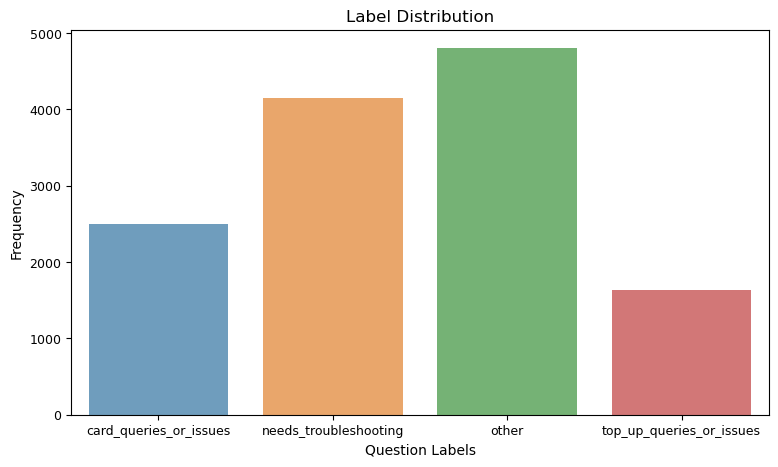

In [206]:
x_label = df1['label'].value_counts()
y_count = x_label.sort_index()
plt.figure(figsize=(9,5))
sns.barplot(x=y_count.index, y=y_count.values, alpha=0.7)
plt.title("Label Distribution", fontsize=12)
plt.ylabel('Frequency', fontsize=10)
plt.yticks(fontsize=9)
plt.xlabel('Question Labels', fontsize=10)
plt.xticks(fontsize=9, rotation=0)
plt.show()

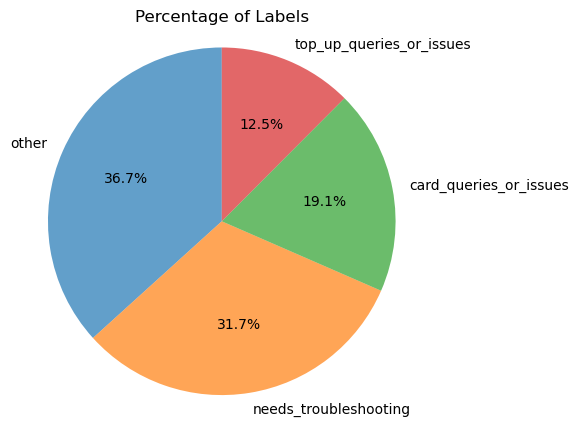

In [207]:
x_label = df1['label'].value_counts()
plt.figure(figsize=(5, 5))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
alpha = 0.7
transparent_colors = [(r, g, b, alpha) for r, g, b in plt.cm.tab10.colors]
plt.pie(x_label.values, labels=x_label.index, autopct='%1.1f%%', startangle=90, colors=transparent_colors)
plt.title('Percentage of Labels')
plt.axis('equal')
plt.show()

### Avg. Number of Words per Label

In [208]:
df1['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

In [209]:
df1

,text,label,word_count
0,Can I automatically top-up when traveling?,top_up_queries_or_issues,6
1,What kind of fiat currency can I used for hold...,other,12
2,I did not get the item I ordered. How should ...,other,26
3,Freeze my account it's been hacked.,needs_troubleshooting,6
4,is there a reason that my payment didnt go thr...,other,10
...,...,...,...
14190,Can you tell me what the disposable cards are ...,card_queries_or_issues,11
14191,The ATM won't give me my card back. I need it ...,card_queries_or_issues,13
14192,Can you please tell me why my card payments ar...,card_queries_or_issues,37
14193,The rate for a currency exchange was wrong whe...,needs_troubleshooting,12


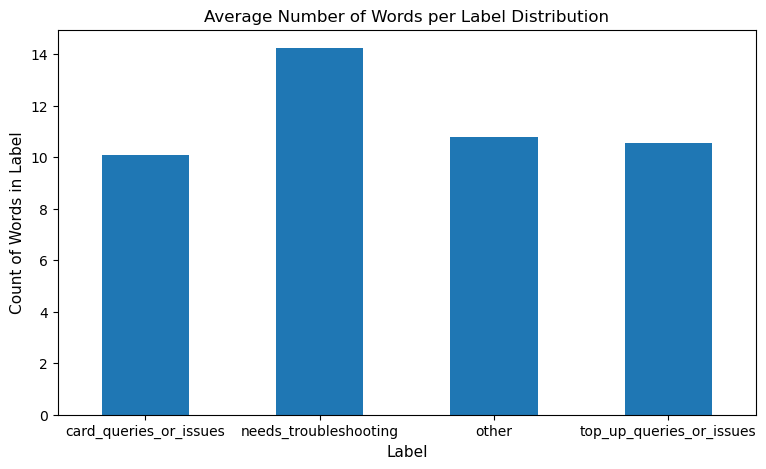

In [210]:
word_avg = df1.groupby('label')['word_count'].mean().plot(kind='bar', figsize=(9,5))
plt.xlabel('Label', fontsize=11)
plt.ylabel('Count of Words in Label', fontsize=11)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.title('Average Number of Words per Label Distribution', fontsize=12)
plt.show()

### Word Frequency Analysis

In [238]:
text_df1 = df1['text']
all_words = []
for wordlist in text_df1:
    for word in wordlist.split():
        all_words.append(word)

In [239]:
all_words

['Can',
 'I',
 'automatically',
 'top-up',
 'when',
 'traveling?',
 'What',
 'kind',
 'of',
 'fiat',
 'currency',
 'can',
 'I',
 'used',
 'for',
 'holding',
 'and',
 'exchange?',
 'I',
 'did',
 'not',
 'get',
 'the',
 'item',
 'I',
 'ordered.',
 'How',
 'should',
 'I',
 'go',
 'about',
 'this?',
 'Should',
 'I',
 'just',
 'cancel',
 'my',
 'order',
 'or',
 'my',
 'payment?',
 'Please',
 'help',
 'me.',
 'Freeze',
 'my',
 'account',
 "it's",
 'been',
 'hacked.',
 'is',
 'there',
 'a',
 'reason',
 'that',
 'my',
 'payment',
 'didnt',
 'go',
 'through',
 'I',
 'thought',
 'transfers',
 'were',
 'free,',
 'why',
 'was',
 'I',
 'charged?',
 'Do',
 'the',
 'disposable',
 'cards',
 'have',
 'a',
 'transaction',
 'limit?',
 'Can',
 'I',
 'pay',
 'for',
 'my',
 'gas',
 'using',
 'my',
 'Apple',
 'watch?',
 "I'm",
 'waiting',
 'for',
 'a',
 'money',
 'transfer',
 'to',
 'show,',
 'still.',
 'Can',
 'I',
 'exchange',
 'currencies',
 'with',
 'my',
 'account?',
 'Is',
 'the',
 'PIN',
 'sent',
 'in

In [244]:
unique_labels = df1['label'].unique()
print(unique_labels)

['top_up_queries_or_issues' 'other' 'needs_troubleshooting'
 'card_queries_or_issues']


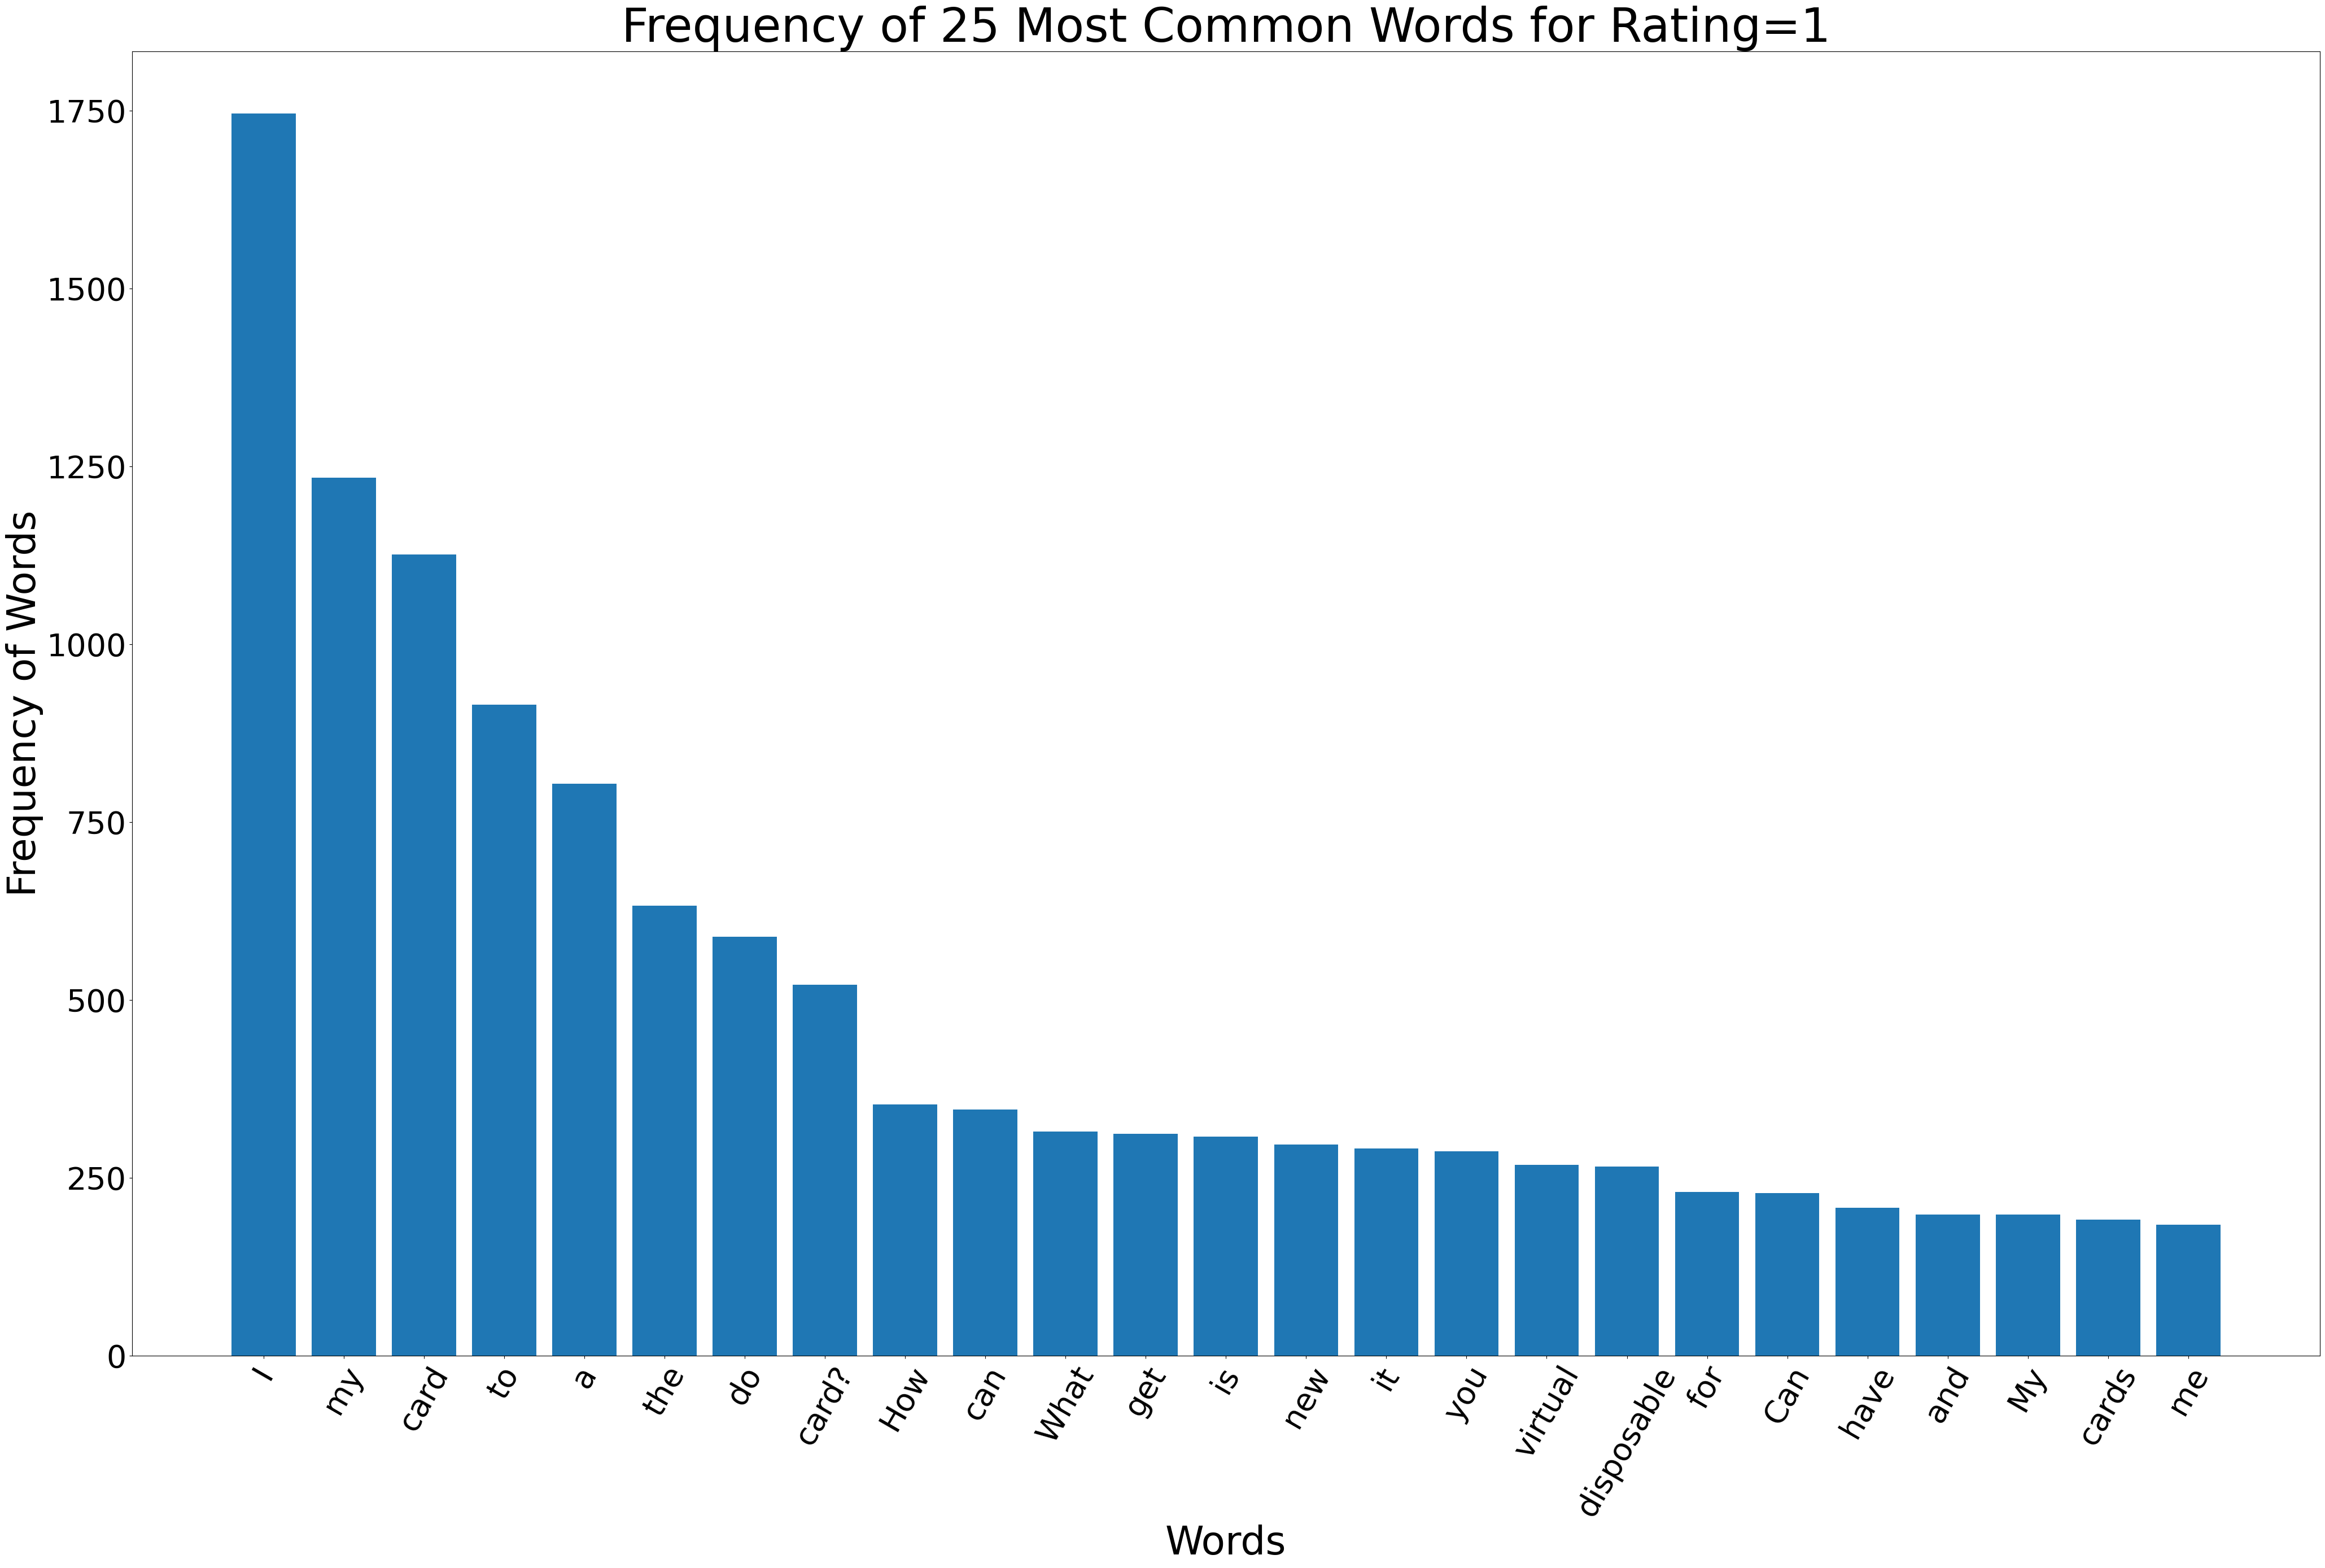

In [250]:
from collections import Counter

group_by = df1.groupby('label')['text'].apply(lambda x: Counter(' '.join(x).split()).most_common(25))
group_by_0 = group_by.iloc[0]
words0 = list(zip(*group_by_0))[0]
freq0 = list(zip(*group_by_0))[1]
plt.figure(figsize=(50,30))
plt.bar(words0, freq0)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=1', fontsize=60)
plt.show()

# Data Preprocessing

In [84]:
# import pandas as pd
# import re
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer, WordNetLemmatizer

# def preprocess(df, use_stemming=False, use_lemmatization=True):
#     # convert text to lowercase
#     df['text'] = df['text'].str.lower()
    
#     # remove special characters and digits
#     df['text'] = df['text'].apply(lambda x: re.sub('[^a-zA-Z\s]', '', x))
#     df['text'] = df['text'].apply(lambda x: re.sub('\d+', '', x))
    
#     # tokenize text
#     df['text'] = df['text'].apply(word_tokenize)
    
#     # remove stopwords
#     stop_words = set(stopwords.words('english'))
#     df['text'] = df['text'].apply(lambda x: [word for word in x if word not in stop_words])
    
#     # apply stemming and/or lemmatization
#     if use_stemming:
#         stemmer = PorterStemmer()
#         df['text'] = df['text'].apply(lambda x: [stemmer.stem(word) for word in x])
    
#     if use_lemmatization:
#         lemmatizer = WordNetLemmatizer()
#         df['text'] = df['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    
#     return df


In [85]:
def preprocess_text(text, use_stemming=False, use_lemmatization=True):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and digits
    text = re.sub('[^a-zA-Z\s]', '', text)
    text = re.sub('\d+', '', text)

    # Tokenize text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Apply stemming and/or lemmatization
    if use_stemming:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]

    if use_lemmatization:
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]

    # Join words back into a string
    text = ' '.join(words)

    return text


In [86]:
df['text'] = df['text'].apply(preprocess_text)

In [87]:
df

,text,label
0,automatically topup traveling,top_up_queries_or_issues
1,kind fiat currency used holding exchange,other
2,get item ordered go cancel order payment pleas...,other
3,freeze account hacked,needs_troubleshooting
4,reason payment didnt go,other
...,...,...
14190,tell disposable card used,card_queries_or_issues
14191,atm wont give card back need back,card_queries_or_issues
14192,please tell card payment going try buy somethi...,card_queries_or_issues
14193,rate currency exchange wrong bought something,needs_troubleshooting


In [88]:
df.to_csv('final_df.csv')

### Word Frequency Analysis after Stop Word Removal and Preprocessing

In [251]:
text_df1 = df['text']
all_words = []
for wordlist in text_df1:
    for word in wordlist.split():
        all_words.append(word)

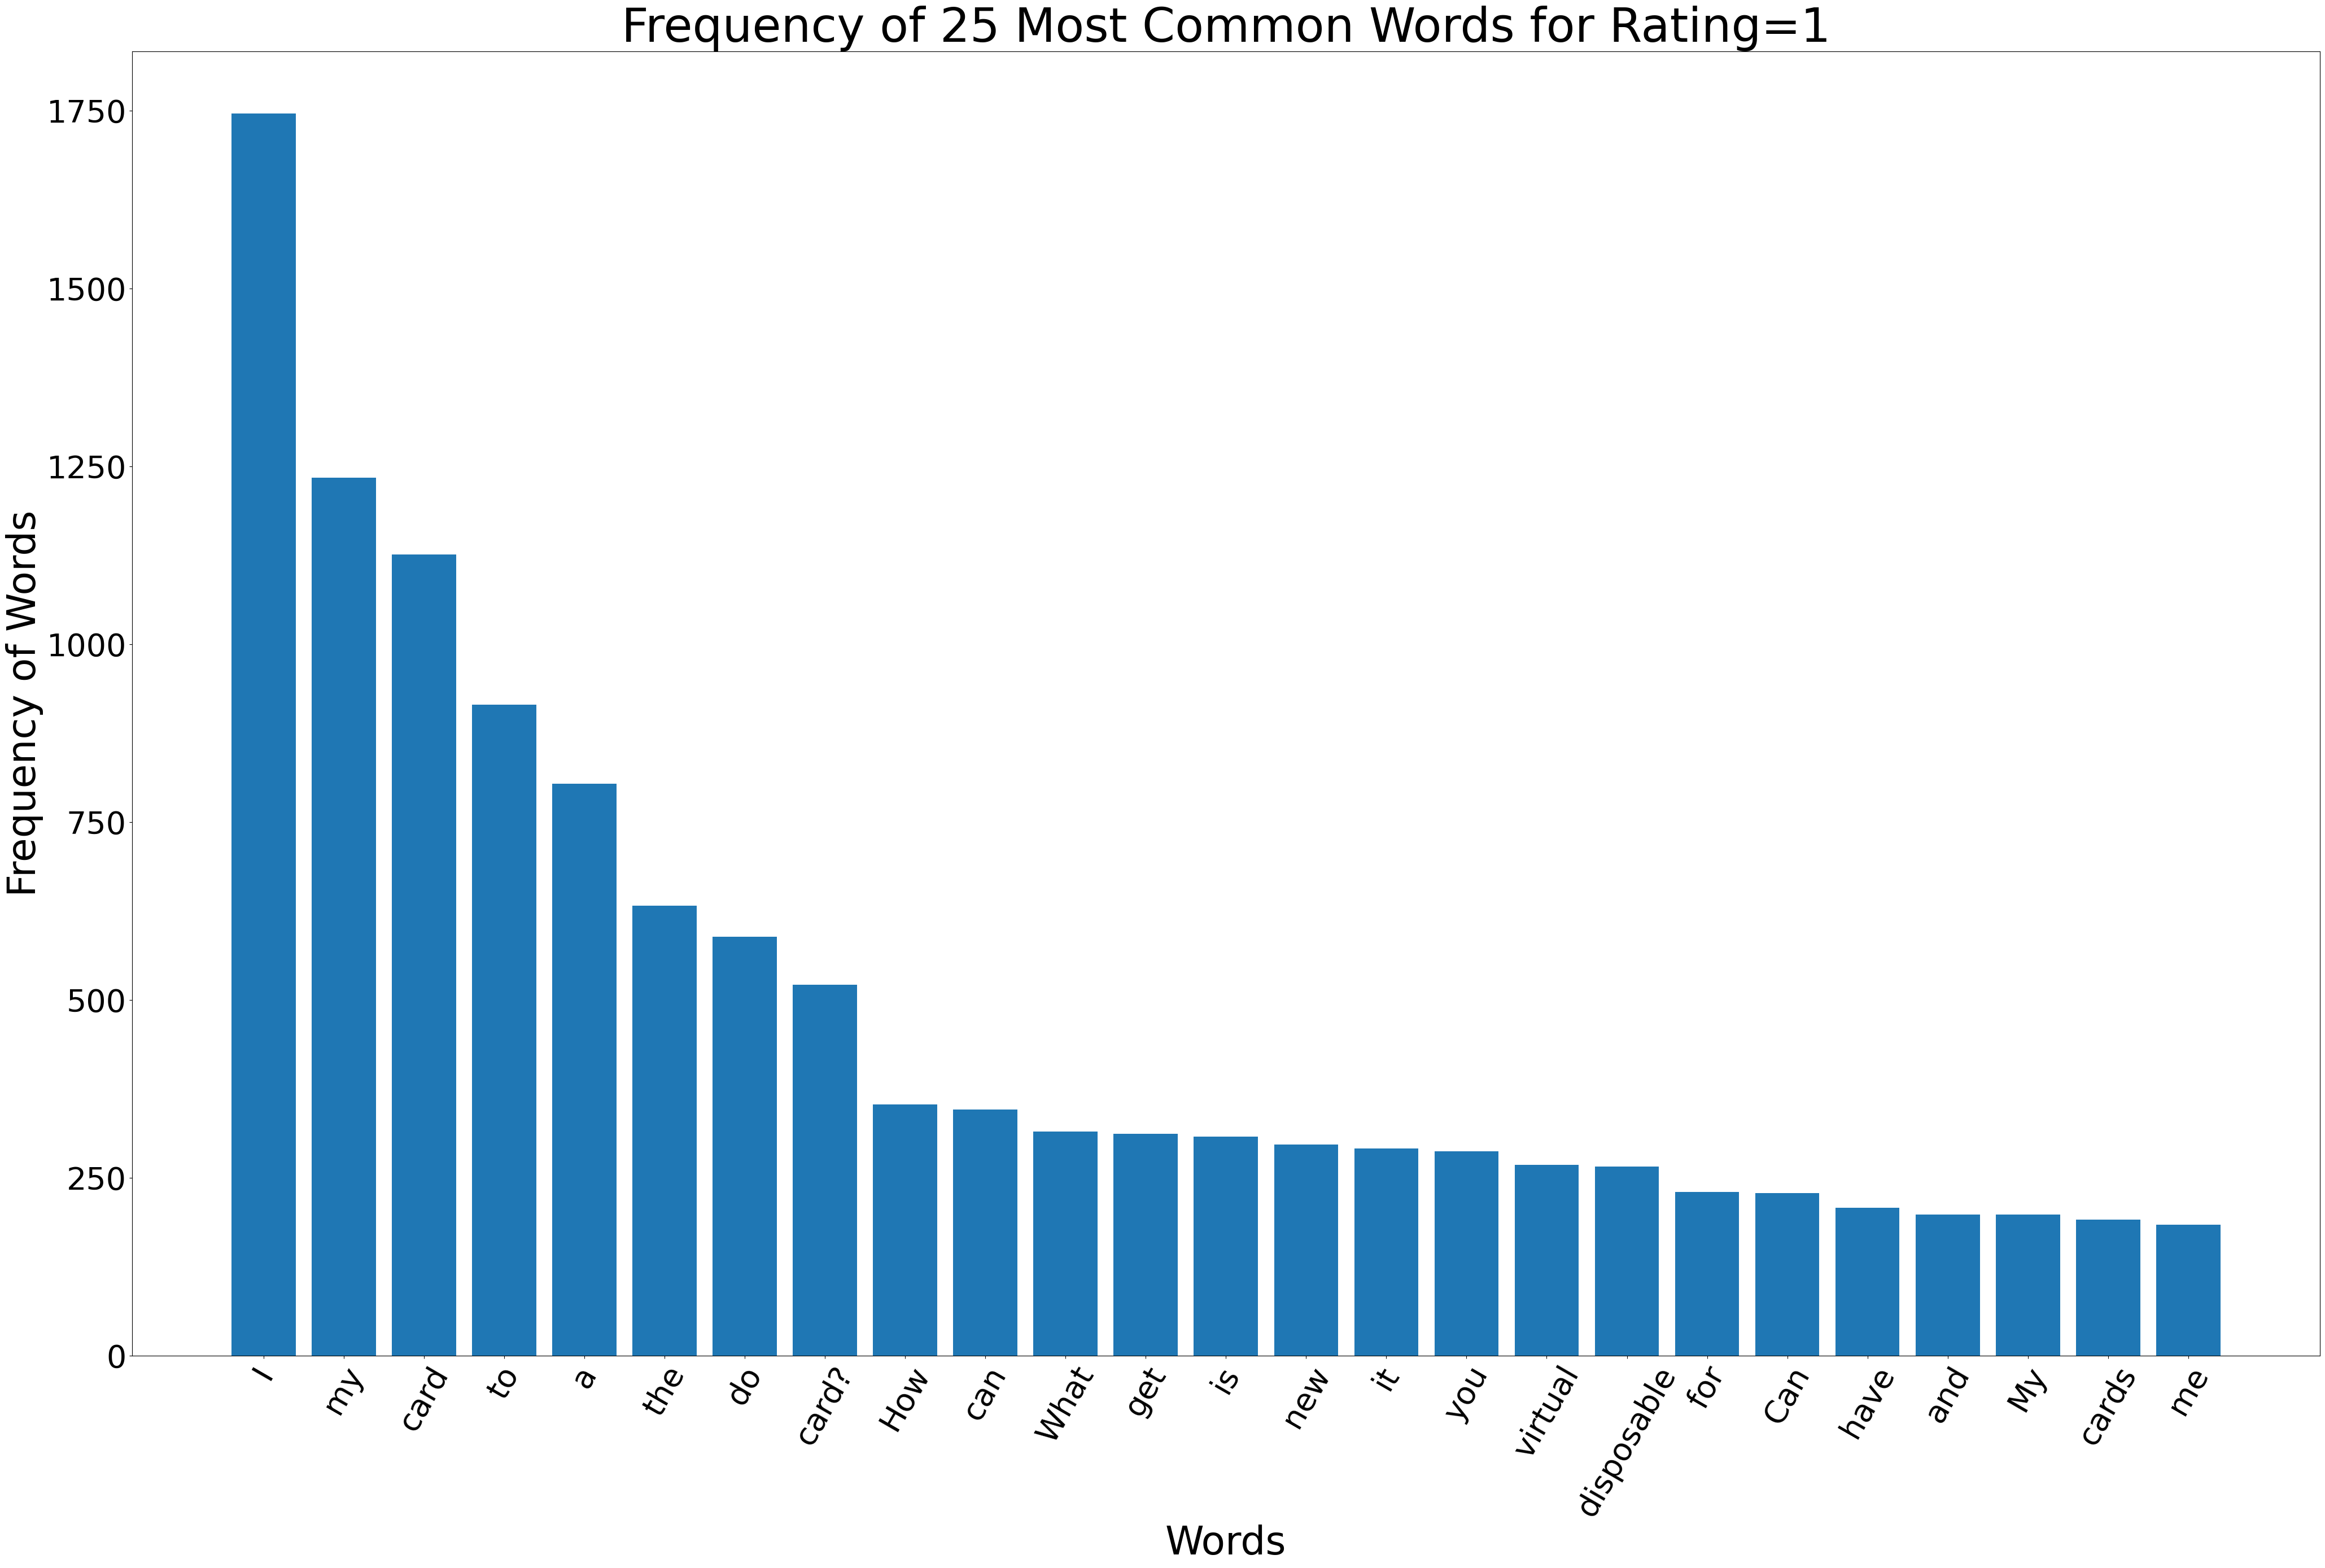

In [252]:
from collections import Counter

group_by = df.groupby('label')['text'].apply(lambda x: Counter(' '.join(x).split()).most_common(25))
group_by_0 = group_by.iloc[0]
words0 = list(zip(*group_by_0))[0]
freq0 = list(zip(*group_by_0))[1]
plt.figure(figsize=(50,30))
plt.bar(words0, freq0)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=1', fontsize=60)
plt.show()

# Train

In [89]:
from sklearn.model_selection import train_test_split

X = df['text'].copy()
y = df['label'].copy()

# Split the dataset into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the split datasets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (10467,)
X_test shape: (2617,)
y_train shape: (10467,)
y_test shape: (2617,)


## Trying different Sampling Techniques

In [90]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# assuming your data is stored in X and y arrays

# perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# train logistic regression model on resampled data
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

# make predictions on test data
y_pred = lr_model.predict(X_test_tfidf)

# generate classification report
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

  card_queries_or_issues       0.83      0.90      0.86       501
   needs_troubleshooting       0.86      0.87      0.86       823
                   other       0.88      0.84      0.86       974
top_up_queries_or_issues       0.96      0.94      0.95       319

                accuracy                           0.87      2617
               macro avg       0.88      0.89      0.88      2617
            weighted avg       0.87      0.87      0.87      2617



In [91]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# assuming your data is stored in X and y arrays

# perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# apply random oversampling to training data only
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_tfidf, y_train)

# train logistic regression model on resampled data
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

# make predictions on test data
y_pred = lr_model.predict(X_test_tfidf)

# generate classification report
print(classification_report(y_test, y_pred))


                          precision    recall  f1-score   support

  card_queries_or_issues       0.83      0.90      0.86       501
   needs_troubleshooting       0.86      0.87      0.87       823
                   other       0.89      0.84      0.86       974
top_up_queries_or_issues       0.96      0.94      0.95       319

                accuracy                           0.87      2617
               macro avg       0.88      0.89      0.89      2617
            weighted avg       0.88      0.87      0.87      2617



In [92]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# assuming your data is stored in X and y arrays

# perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# apply random undersampling to training data only
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_tfidf, y_train)

# train logistic regression model on resampled data
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

# make predictions on test data
y_pred = lr_model.predict(X_test_tfidf)

# generate classification report
print(classification_report(y_test, y_pred))


                          precision    recall  f1-score   support

  card_queries_or_issues       0.79      0.90      0.85       501
   needs_troubleshooting       0.84      0.85      0.84       823
                   other       0.87      0.80      0.83       974
top_up_queries_or_issues       0.93      0.94      0.94       319

                accuracy                           0.85      2617
               macro avg       0.86      0.87      0.87      2617
            weighted avg       0.85      0.85      0.85      2617



In [93]:
# Random Oversampler gives the best results.

In [94]:
# Perform oversampling on the training set
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train.to_numpy().reshape(-1, 1), y_train)

In [95]:
X_train_resampled

array([['way automatic top'],
       ['money asked asked got'],
       ['virtual card going'],
       ...,
       ['top verification code found'],
       ['money added automatically necessary'],
       ['could explain topup gone yet']], dtype=object)

In [96]:
y_train_resampled

0        top_up_queries_or_issues
1           needs_troubleshooting
2           needs_troubleshooting
3                           other
4                           other
                   ...           
15315    top_up_queries_or_issues
15316    top_up_queries_or_issues
15317    top_up_queries_or_issues
15318    top_up_queries_or_issues
15319    top_up_queries_or_issues
Name: label, Length: 15320, dtype: object

# Logistic Regression

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define a pipeline for text classification
text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

# Train the classifier on the resampled training data
text_clf.fit(X_train_resampled.ravel(), y_train_resampled)

# Predict on the testing set
y_pred = text_clf.predict(X_test)

# Evaluate the classifier performance
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

  card_queries_or_issues       0.83      0.90      0.86       501
   needs_troubleshooting       0.86      0.87      0.87       823
                   other       0.88      0.84      0.86       974
top_up_queries_or_issues       0.96      0.94      0.95       319

                accuracy                           0.87      2617
               macro avg       0.88      0.89      0.89      2617
            weighted avg       0.87      0.87      0.87      2617



In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define a pipeline for text classification
text_clf_lr = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

# Define the hyperparameters to search over
param_grid_lr = {'clf__C': [0.01, 0.1, 1, 10], 'clf__penalty': ['l1', 'l2']}

# Use GridSearchCV to search over the hyperparameters
grid_search_lr = GridSearchCV(text_clf_lr, param_grid=param_grid_lr, cv=5, n_jobs=-1)

# Train the classifier on the resampled training data
grid_search_lr.fit(X_train_resampled.ravel(), y_train_resampled)

# Print the best hyperparameters and the best score
print("Best Hyperparameters: ", grid_search_lr.best_params_)
print("Best Score: ", grid_search_lr.best_score_)

/home/ashis-solomon/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ashis-solomon/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Best Hyperparameters:  {'clf__C': 10, 'clf__penalty': 'l2'}
Best Score:  0.9142297650130548


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define a pipeline for text classification
text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LogisticRegression(C=10, penalty='l2'))])

# Train the classifier on the resampled training data
text_clf.fit(X_train_resampled.ravel(), y_train_resampled)

# Predict on the testing set
y_pred = text_clf.predict(X_test)

# Evaluate the classifier performance
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

  card_queries_or_issues       0.85      0.89      0.87       501
   needs_troubleshooting       0.86      0.87      0.87       823
                   other       0.88      0.85      0.86       974
top_up_queries_or_issues       0.95      0.93      0.94       319

                accuracy                           0.88      2617
               macro avg       0.88      0.89      0.88      2617
            weighted avg       0.88      0.88      0.88      2617



# Multinomial NB

In [100]:
from sklearn.naive_bayes import MultinomialNB

# Define a pipeline for text classification using Naive Bayes
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

# Train the Naive Bayes classifier on the resampled training data
text_clf_nb.fit(X_train_resampled.ravel(), y_train_resampled)

# Predict on the testing set using Naive Bayes classifier
y_pred_nb = text_clf_nb.predict(X_test)

# Evaluate the Naive Bayes classifier performance
print(classification_report(y_test, y_pred_nb))

                          precision    recall  f1-score   support

  card_queries_or_issues       0.82      0.84      0.83       501
   needs_troubleshooting       0.80      0.87      0.83       823
                   other       0.88      0.76      0.82       974
top_up_queries_or_issues       0.81      0.93      0.87       319

                accuracy                           0.83      2617
               macro avg       0.83      0.85      0.84      2617
            weighted avg       0.84      0.83      0.83      2617



In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Define a pipeline for text classification
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

# Define the hyperparameters to search over
param_grid_nb = {'clf__alpha': [0.01, 0.1, 1, 10]}

# Use GridSearchCV to search over the hyperparameters
grid_search_nb = GridSearchCV(text_clf_nb, param_grid=param_grid_nb, cv=5, n_jobs=-1)

# Train the classifier on the resampled training data
grid_search_nb.fit(X_train_resampled.ravel(), y_train_resampled)

# Print the best hyperparameters and the best score
print("Best Hyperparameters: ", grid_search_nb.best_params_)
print("Best Score: ", grid_search_nb.best_score_)

Best Hyperparameters:  {'clf__alpha': 0.1}
Best Score:  0.8699738903394255


In [102]:
from sklearn.naive_bayes import MultinomialNB

# Define a pipeline for text classification using Naive Bayes
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB(alpha=0.1))])

# Train the Naive Bayes classifier on the resampled training data
text_clf_nb.fit(X_train_resampled.ravel(), y_train_resampled)

# Predict on the testing set using Naive Bayes classifier
y_pred_nb = text_clf_nb.predict(X_test)

# Evaluate the Naive Bayes classifier performance
print(classification_report(y_test, y_pred_nb))

                          precision    recall  f1-score   support

  card_queries_or_issues       0.83      0.83      0.83       501
   needs_troubleshooting       0.81      0.86      0.83       823
                   other       0.86      0.78      0.82       974
top_up_queries_or_issues       0.82      0.91      0.86       319

                accuracy                           0.83      2617
               macro avg       0.83      0.84      0.83      2617
            weighted avg       0.83      0.83      0.83      2617



# SVC

In [103]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

# Define a pipeline for text classification using SVM
text_clf_svm = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(kernel='linear'))
])

# Train the SVM classifier on the resampled training data
text_clf_svm.fit(X_train_resampled.ravel(), y_train_resampled)

# Predict on the testing set using SVM classifier
y_pred_svm = text_clf_svm.predict(X_test)

# Evaluate the SVM classifier performance
print(classification_report(y_test, y_pred_svm))

                          precision    recall  f1-score   support

  card_queries_or_issues       0.82      0.91      0.87       501
   needs_troubleshooting       0.87      0.88      0.87       823
                   other       0.90      0.83      0.87       974
top_up_queries_or_issues       0.95      0.94      0.95       319

                accuracy                           0.88      2617
               macro avg       0.88      0.89      0.89      2617
            weighted avg       0.88      0.88      0.88      2617



In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Define a pipeline for text classification using SVC
text_clf_svc = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC())])

# Define the parameter grid to search over
param_grid = {
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf'],
    'clf__gamma': ['scale', 'auto']
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(text_clf_svc, param_grid=param_grid, cv=5, n_jobs=-1)

# Train the classifier on the resampled training data
grid_search.fit(X_train_resampled.ravel(), y_train_resampled)

# Print the best hyperparameters found
print("Best parameters: ", grid_search.best_params_)

# Predict on the testing set using the best estimator from the grid search
y_pred_svc = grid_search.best_estimator_.predict(X_test)

# Evaluate the performance of the SVC model
print(classification_report(y_test, y_pred_svc))

Best parameters:  {'clf__C': 10, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
                          precision    recall  f1-score   support

  card_queries_or_issues       0.90      0.92      0.91       501
   needs_troubleshooting       0.95      0.91      0.93       823
                   other       0.92      0.93      0.93       974
top_up_queries_or_issues       0.96      0.95      0.95       319

                accuracy                           0.93      2617
               macro avg       0.93      0.93      0.93      2617
            weighted avg       0.93      0.93      0.93      2617



# Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

# Define a pipeline for text classification using Random Forest
text_clf_rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the Random Forest classifier on the resampled training data
text_clf_rf.fit(X_train_resampled.ravel(), y_train_resampled)

# Predict on the testing set using Random Forest classifier
y_pred_rf = text_clf_rf.predict(X_test)

# Evaluate the Random Forest classifier performance
print(classification_report(y_test, y_pred_rf))

                          precision    recall  f1-score   support

  card_queries_or_issues       0.86      0.91      0.89       501
   needs_troubleshooting       0.93      0.91      0.92       823
                   other       0.91      0.91      0.91       974
top_up_queries_or_issues       0.96      0.93      0.95       319

                accuracy                           0.91      2617
               macro avg       0.92      0.92      0.92      2617
            weighted avg       0.91      0.91      0.91      2617



In [106]:
from sklearn.model_selection import GridSearchCV

# Define a pipeline for text classification using Random Forest
text_clf_rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier(random_state=42))
])

# Define the grid of hyperparameters to search over
param_grid = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [5, 10, 15]
}

# Create a GridSearchCV object with the pipeline and hyperparameter grid
grid_search_rf = GridSearchCV(text_clf_rf, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object on the resampled training data
grid_search_rf.fit(X_train_resampled.ravel(), y_train_resampled)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters found for Random Forest classifier:")
print(grid_search_rf.best_params_)

# Predict on the testing set using the best Random Forest classifier
y_pred_rf = grid_search_rf.predict(X_test)

# Evaluate the best Random Forest classifier performance
print(classification_report(y_test, y_pred_rf))

Best hyperparameters found for Random Forest classifier:
{'clf__max_depth': 15, 'clf__n_estimators': 300, 'tfidf__max_df': 0.5}
                          precision    recall  f1-score   support

  card_queries_or_issues       0.71      0.88      0.79       501
   needs_troubleshooting       0.83      0.80      0.82       823
                   other       0.85      0.78      0.81       974
top_up_queries_or_issues       0.92      0.89      0.90       319

                accuracy                           0.82      2617
               macro avg       0.83      0.84      0.83      2617
            weighted avg       0.82      0.82      0.82      2617



In [107]:
from sklearn.ensemble import GradientBoostingClassifier

# Define a pipeline for text classification using gradient boosting
text_clf_gb = Pipeline([('tfidf', TfidfVectorizer()), ('clf', GradientBoostingClassifier())])

# Train the gradient boosting classifier on the resampled training data
text_clf_gb.fit(X_train_resampled.ravel(), y_train_resampled)

# Predict on the testing set using gradient boosting classifier
y_pred_gb = text_clf_gb.predict(X_test)

# Evaluate the gradient boosting classifier performance
print(classification_report(y_test, y_pred_gb))

                          precision    recall  f1-score   support

  card_queries_or_issues       0.74      0.92      0.82       501
   needs_troubleshooting       0.86      0.77      0.81       823
                   other       0.84      0.81      0.82       974
top_up_queries_or_issues       0.93      0.92      0.93       319

                accuracy                           0.83      2617
               macro avg       0.84      0.86      0.85      2617
            weighted avg       0.84      0.83      0.83      2617



In [108]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Define a pipeline for text classification using AdaBoost
text_clf_ab = Pipeline([('tfidf', TfidfVectorizer()), ('clf', AdaBoostClassifier())])

# Train the AdaBoost classifier on the resampled training data
text_clf_ab.fit(X_train_resampled.ravel(), y_train_resampled)

# Predict on the testing set using AdaBoost classifier
y_pred_ab = text_clf_ab.predict(X_test)

# Evaluate the AdaBoost classifier performance
print(classification_report(y_test, y_pred_ab))

                          precision    recall  f1-score   support

  card_queries_or_issues       0.64      0.86      0.73       501
   needs_troubleshooting       0.61      0.25      0.35       823
                   other       0.49      0.75      0.59       974
top_up_queries_or_issues       0.67      0.27      0.39       319

                accuracy                           0.55      2617
               macro avg       0.60      0.53      0.52      2617
            weighted avg       0.58      0.55      0.52      2617



In [268]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a pipeline for text classification using AdaBoost
text_clf_ab = Pipeline([('tfidf', TfidfVectorizer()), ('clf', AdaBoostClassifier())])

# Train the AdaBoost classifier on the resampled training data
text_clf_ab.fit(X_train_resampled.ravel(), y_train_resampled)

# Predict on the testing set using AdaBoost classifier
y_pred_ab = text_clf_ab.predict(X_test)

# Evaluate the AdaBoost classifier performance
print(classification_report(y_test, y_pred_ab))

# Calculate accuracy, precision, and recall scores
accuracy = accuracy_score(y_test, y_pred_ab)
precision = precision_score(y_test, y_pred_ab, average='macro')
recall = recall_score(y_test, y_pred_ab, average='macro')
f1_score = f1_score(y_test,y_pred_ab, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

                          precision    recall  f1-score   support

  card_queries_or_issues       0.62      0.85      0.72       501
   needs_troubleshooting       0.55      0.73      0.63       823
                   other       0.56      0.39      0.46       974
top_up_queries_or_issues       0.68      0.35      0.47       319

                accuracy                           0.58      2617
               macro avg       0.60      0.58      0.57      2617
            weighted avg       0.58      0.58      0.56      2617

Accuracy: 0.5792892625143294
Precision: 0.6018818296531817
Recall: 0.5801116888929703


In [255]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

# Define a pipeline for text classification using XGBoost
text_clf_xgb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', XGBClassifier())
])

# Train the XGBoost classifier on the resampled training data
text_clf_xgb.fit(X_train_resampled.ravel(), y_train_resampled)

# Predict on the testing set using XGBoost classifier
y_pred_xgb = text_clf_xgb.predict(X_test)

# Evaluate the XGBoost classifier performance
print(classification_report(y_test, y_pred_xgb))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got ['card_queries_or_issues' 'needs_troubleshooting' 'other'
 'top_up_queries_or_issues']

In [282]:
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
# from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

# # Define a list of classifiers to iterate through
# classifiers = [
#     ('Logistic Regression', Pipeline([('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])),
#     ('Naive Bayes', Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])),
#     ('SVM', Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(kernel='linear'))])),
#     ('Random Forest', Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100, random_state=42))])),
#     ('Gradient Boosting', Pipeline([('tfidf', TfidfVectorizer()), ('clf', GradientBoostingClassifier())])),
#     ('AdaBoost', Pipeline([('tfidf', TfidfVectorizer()), ('clf', AdaBoostClassifier())]))
# ]

# # Iterate through each classifier and print evaluation metrics
# for name, classifier in classifiers:
#     classifier.fit(X_train_resampled.ravel(), y_train_resampled)
#     y_pred = classifier.predict(X_test)
#     print('-' * 70)
#     print(name.upper())
#     print(classification_report(y_test, y_pred))
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred, average='macro')
#     recall = recall_score(y_test, y_pred, average='macro')
#     print("Accuracy:", format(accuracy, '.4f'))
#     print("Precision:", format(precision, '.4f'))
#     print("Recall:", format(recall, '.4f'))
#     print('-' * 70)
#     print('\n')


In [281]:
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier


def evaluate_classifier(name, classifier, X_train, y_train, X_test, y_test, save_model=False, n_decimals=4):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print('-' * 70)
    print(f'{name.upper()} CLASSIFIER')
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    print(f"Accuracy: {accuracy:.{n_decimals}f}")
    print(f"Precision: {precision:.{n_decimals}f}")
    print(f"Recall: {recall:.{n_decimals}f}")
    print('-' * 70)
    print('\n')

    if save_model:
        with open(f'{name.lower()}_classifier.pkl', 'wb') as f:
            pickle.dump(classifier, f)


# Define the classifiers with their corresponding pipelines
classifiers = {
    'logistic regression': Pipeline([('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())]),
    'naive bayes': Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())]),
    'svm': Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(kernel='linear'))]),
    'random forest': Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100, random_state=42))]),
    'gradient boosting': Pipeline([('tfidf', TfidfVectorizer()), ('clf', GradientBoostingClassifier())]),
#     'adaboost': Pipeline([('tfidf', TfidfVectorizer()), ('clf', AdaBoostClassifier(n_estimators=300))])
}

# Evaluate each classifier and print evaluation metrics
for name, classifier in classifiers.items():
    evaluate_classifier(name, classifier, X_train_resampled.ravel(), y_train_resampled, X_test, y_test, save_model=True, n_decimals=4)


----------------------------------------------------------------------
LOGISTIC REGRESSION CLASSIFIER
                          precision    recall  f1-score   support

  card_queries_or_issues       0.86      0.90      0.88       501
   needs_troubleshooting       0.87      0.90      0.88       823
                   other       0.90      0.85      0.87       974
top_up_queries_or_issues       0.96      0.95      0.95       319

                accuracy                           0.89      2617
               macro avg       0.90      0.90      0.90      2617
            weighted avg       0.89      0.89      0.89      2617

Accuracy: 0.8880
Precision: 0.8954
Recall: 0.9010
----------------------------------------------------------------------


----------------------------------------------------------------------
NAIVE BAYES CLASSIFIER
                          precision    recall  f1-score   support

  card_queries_or_issues       0.83      0.84      0.84       501
   needs_troubles

In [285]:
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb


def evaluate_classifier(name, classifier, X_train, y_train, X_test, y_test, save_model=False, n_decimals=4):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print('-' * 70)
    print(f'{name.upper()} CLASSIFIER')
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    print(f"Accuracy: {accuracy:.{n_decimals}f}")
    print(f"Precision: {precision:.{n_decimals}f}")
    print(f"Recall: {recall:.{n_decimals}f}")
    print('-' * 70)
    print('\n')

    if save_model:
        with open(f'{name.lower()}_classifier.pkl', 'wb') as f:
            pickle.dump(classifier, f)


# Define the classifiers with their corresponding pipelines
classifiers = {
    'logistic regression': Pipeline([('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())]),
    'naive bayes': Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())]),
    'svm': Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(kernel='linear'))]),
    'adaboost': Pipeline([('tfidf', TfidfVectorizer()), ('clf', AdaBoostClassifier(n_estimators=300))]),  
    'random forest': Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100, random_state=42))]),
    'gradient boosting': Pipeline([('tfidf', TfidfVectorizer()), ('clf', GradientBoostingClassifier())])
#     'xgboost': Pipeline([('tfidf', TfidfVectorizer()), ('clf', xgb.XGBClassifier())])
}

# Evaluate each classifier and print evaluation metrics
for name, classifier in classifiers.items():
    evaluate_classifier(name, classifier, X_train_resampled.ravel(), y_train_resampled, X_test, y_test, save_model=True, n_decimals=4)


----------------------------------------------------------------------
LOGISTIC REGRESSION CLASSIFIER
                          precision    recall  f1-score   support

  card_queries_or_issues       0.86      0.90      0.88       501
   needs_troubleshooting       0.87      0.90      0.88       823
                   other       0.90      0.85      0.87       974
top_up_queries_or_issues       0.96      0.95      0.95       319

                accuracy                           0.89      2617
               macro avg       0.90      0.90      0.90      2617
            weighted avg       0.89      0.89      0.89      2617

Accuracy: 0.8880
Precision: 0.8954
Recall: 0.9010
----------------------------------------------------------------------


----------------------------------------------------------------------
NAIVE BAYES CLASSIFIER
                          precision    recall  f1-score   support

  card_queries_or_issues       0.83      0.84      0.84       501
   needs_troubles